# Peter Kryspin

## NHL Team Statistical Analysis

In [1]:
# Import Statements
from sklearn.linear_model import LinearRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import linear_model
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             accuracy_score, roc_auc_score, RocCurveDisplay)


# BeautifulSoup Web Scraping

In [2]:
########## Define the URL to scrape
#url = "https://www.nhl.com/stats/teams"

#response = requests.get(url)

########## Check if the request was successful
#if response.status_code == 200:
    #soup = BeautifulSoup(response.content, "html.parser")
    ######## print(soup.prettify())
    ######## Find the table containing the team statistics
    #table = soup.find("div", {"class" : "rt-table"})

    ######## Loop through each row of the table
    #for row in table.find_all("rt-tr-group")[1:]:
        #cells = row.find_all("rt-td")
        
        ######## Extract the team name, season, games played....
        #Team = cells[0].text
        #Season = cells[1].text
        #GP = cells[2].text
        #W = cells[3].text
        #L = cells[4].text
        #T = cells[5].text
        #OT = cells[6].text
        #P = cells[7].text

#else:
    ######## If the request was not successful, print an error message
    #print("Failed to retrieve data from NHL.com.")


Currently, the html parser is not functioning correctly. It seems that at line 15, the table object cannot "find_all" instances for each team. So the table object was not defined properly.

In [3]:
#team_stats["Team"]

# Data Exploration: Team Stats '21-'22

In [4]:
team_stats = pd.read_csv("Team_stats_21_22.csv")
#team_stats.head()
#print(team_stats["Team"])

# A color was chosen from each team to represent on scatter plots
team_stats["Color"] = ["#FFB81C", "#CE1126", "#CE1126", "#00205B", "#006847", "#B4975A", "#002868", "#0038A8", \
                       "#111111", "#A6192E", "#99D9D9", "#FF4C00", "#6F263D", "#041E42", "#00539B", "#FCB514", \
                       "#003087", "#D2001C", "#B79257", "#041E42", "#041E42", "#FFB81C", "#CE1126", "#002F87", \
                       "#F74902", "#AF1E2D", "#00843D", "#E2D6B5", "#F47A38", "#532A44", "#CF0A2C", "#002654"]
# A png logo for each team
team_stats["Logo"] = ["Bruins.png", "Hurricanes.png", "Devils.png", "Leafs.png", "Stars.png", "Golden_Knights.png", \
                     "Lightning.png", "Rangers.png", "Kings.png", "Wild.png", "Kraken.png", "Oilers.png", \
                     "Avalanche.png", "Jets.png", "Islanders.png", "Penguins.png", "Sabres.png", "Flames.png", \
                     "Senators.png", "Panthers.png", "Capitals.png", "Predators.png", "Red_Wings.png", "Blues.png", \
                     "Flyers.png", "Canadiens.png", "Canucks.png", "Coyotes.png", "Ducks.png", "Sharks.png", \
                     "Blackhawks.png", "Blue_Jackets.png"]


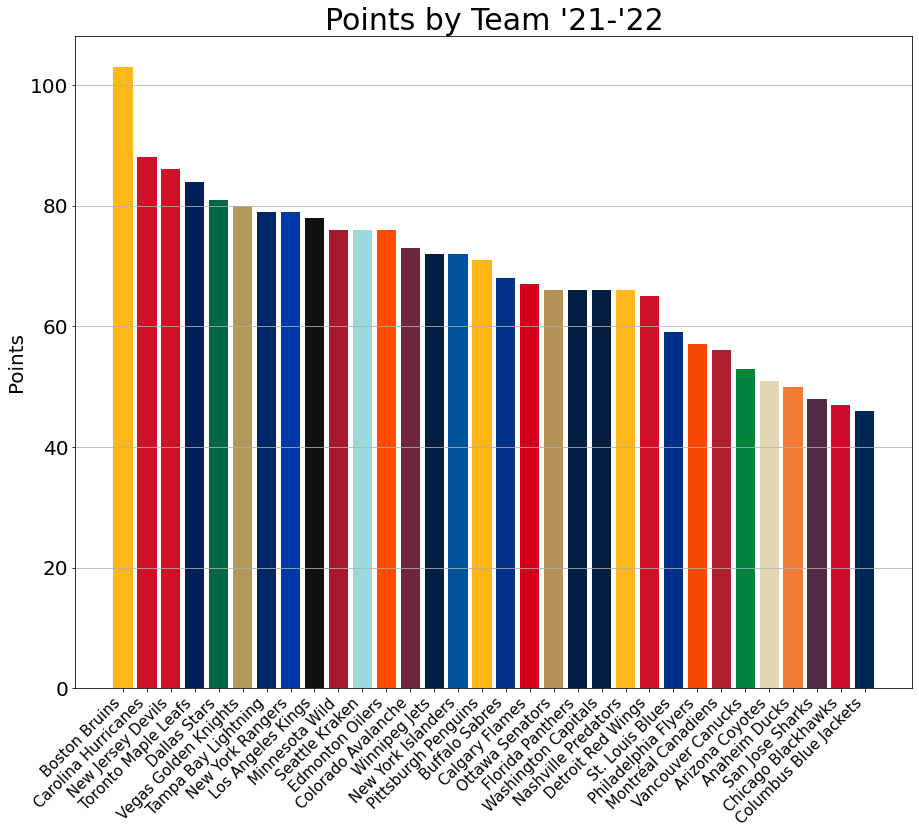

In [5]:
plt.figure(figsize=(15,12))
plt.bar(team_stats["Team"], team_stats["P"], color = team_stats["Color"])
plt.xticks(rotation=45, ha='right', fontsize = 15)
plt.yticks(fontsize = 20)
plt.grid(axis = 'y')
plt.ylabel("Points", fontsize = 20)
plt.title("Points by Team '21-'22", fontsize = 30)
plt.show()

## Multiple Linear Regression Model: Predicting Points

In [6]:
print(team_stats[["P","W"]].corr()["P"]["W"])
print(team_stats[["P","L"]].corr()["P"]["L"])

0.9814740905997721
-0.97671102331935


In [7]:
# Predictors exclude wins/losses as they are highly correlated with points
predictors = team_stats[["PP%", "PK%", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%"]].to_numpy()
predictors
points = team_stats["P"].to_numpy()

model = linear_model.LinearRegression()
model.fit(predictors, points)

print(f'Points = {model.intercept_:.3} + ({model.coef_[0]:.3})PP% + ({model.coef_[1]:.3})PK% + ' \
      f'({model.coef_[2]:.3})Net PP% + ({model.coef_[3]:.3})Net PK% + ({model.coef_[4]:.3})Shots/GP + ' \
      f'({model.coef_[5]:.3})SA/GP + ({model.coef_[6]:.3})FOW%')

Points = 15.7 + (-1.58)PP% + (0.645)PK% + (2.71)Net PP% + (-0.0103)Net PK% + (0.605)Shots/GP + (-1.82)SA/GP + (0.505)FOW%


In [8]:
for i in ["PP%", "PK%", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%"]:
    print(f'{i} :   {team_stats[["P", i ]].corr()["P"][i]}')

PP% :   0.5489598193210944
PK% :   0.554053720212224
Net PP% :   0.6428240359578112
Net PK% :   0.6201424878021123
Shots/GP :   0.6309841455716084
SA/GP :   -0.6549009058900197
FOW% :   0.4403047788615415


With SA/GP being the most correlated with points should be further vidualized.

## SA/GP and Points

Linear coefficient: -3.3176550404998806


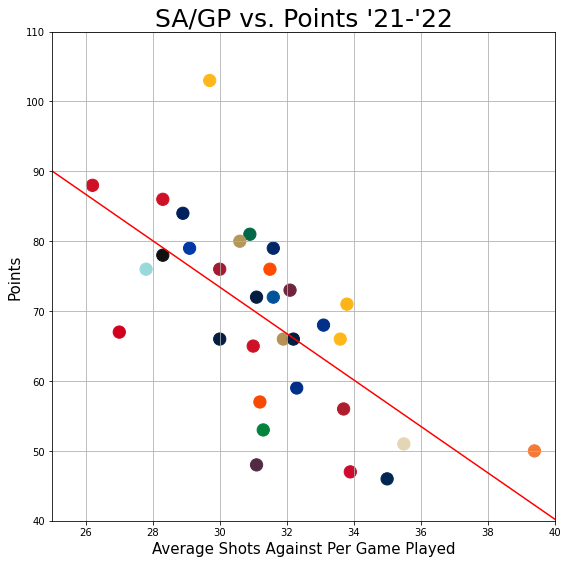

In [9]:
# scatter plot
plt.rcParams["figure.figsize"] = [9,9]
plt.scatter(team_stats["SA/GP"], team_stats["P"], c = team_stats["Color"], s = 150)
plt.xlabel("Average Shots Against Per Game Played", fontsize = 15)
plt.ylabel("Points", fontsize = 15)
plt.title("SA/GP vs. Points '21-'22", fontsize = 25)


# regression line
lr = LinearRegression()
lr.fit(team_stats["SA/GP"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.axline(xy1=(0, lr.intercept_), slope= w, color='r')
plt.xlim([25,40])
plt.ylim([40,110])
plt.grid()

# linear coefficient
print(f'Linear coefficient: {w}')

Utilizing the SLR model predicting points with only SA/GP, the singular predictor had a stronger negative effect on points.

Here is another version of the same visualization, only with the team logos.

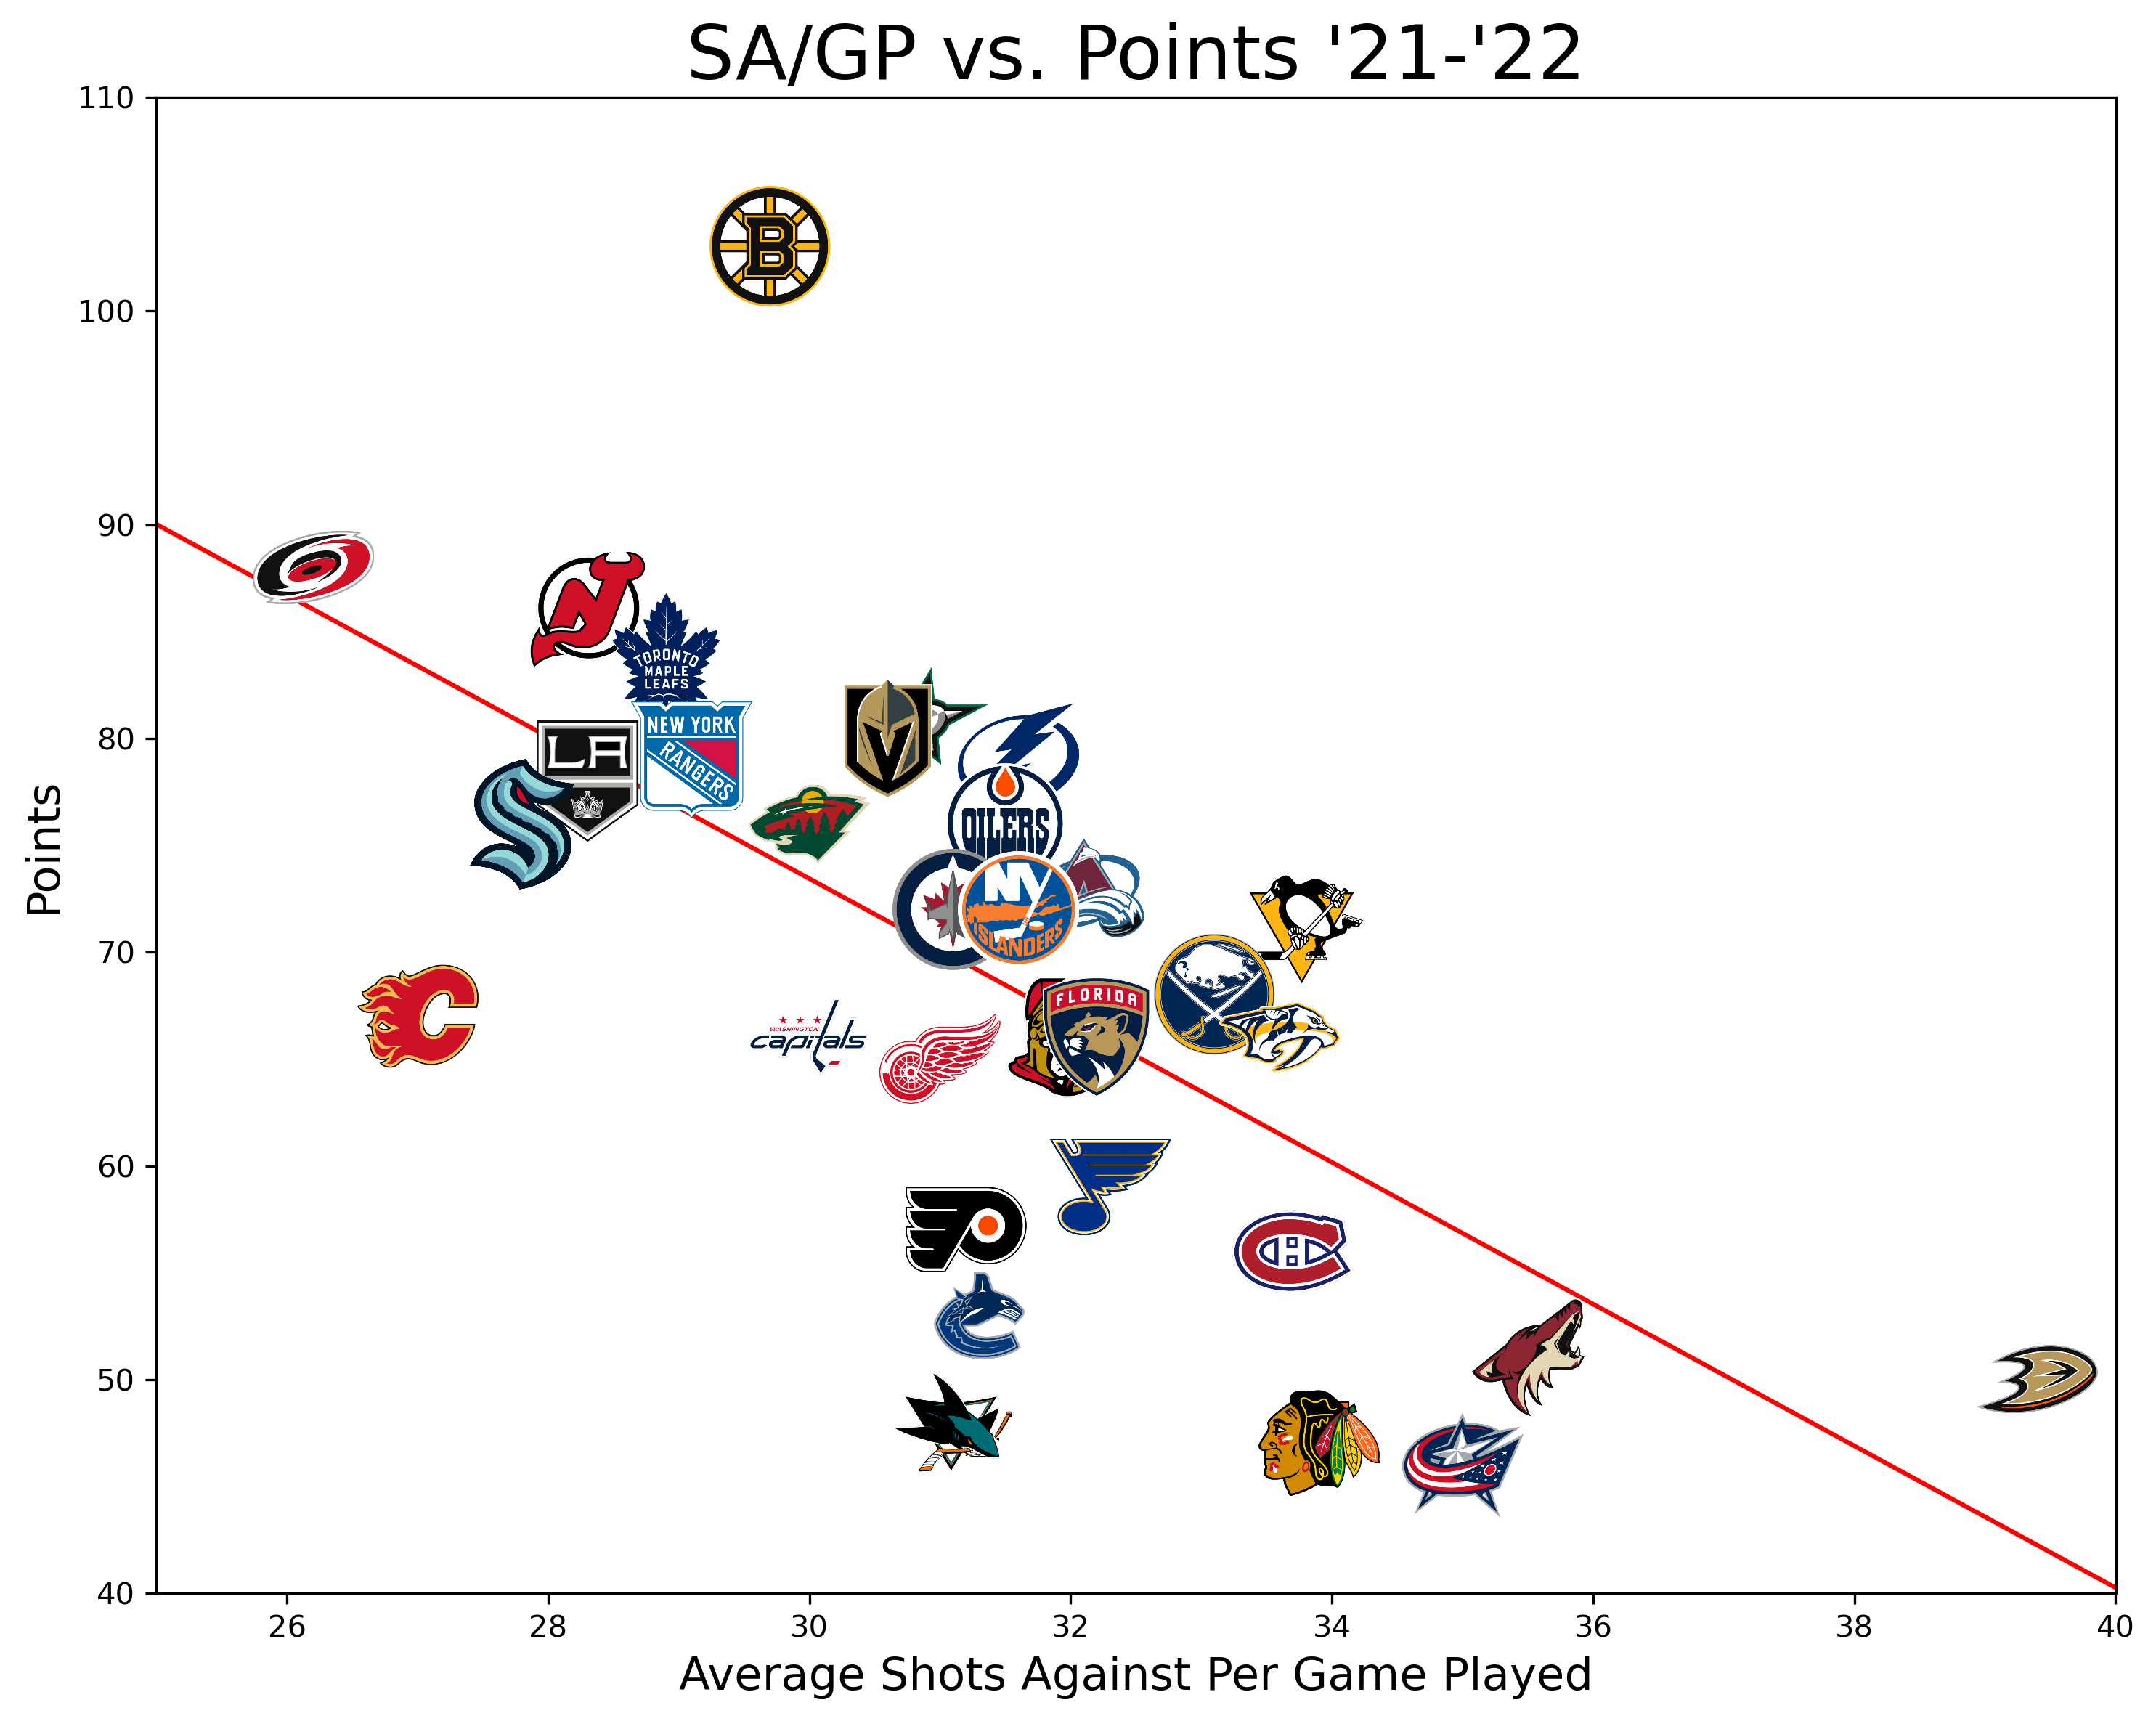

In [10]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.dpi'] = 300


def getImage(path):
    if path == "Kraken.png": # Oversized png needs to be adjusted
        return OffsetImage(plt.imread(path, format="png"), zoom = .04)
    else:
        return OffsetImage(plt.imread(path, format="png"), zoom = .1)

fig, ax = plt.subplots()

# Plot png images on corresponding coordinates
for x0, y0, path in zip(team_stats["SA/GP"], team_stats["P"], team_stats["Logo"]):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    
plt.xlim([25,40])
plt.ylim([40,110])

# lr.intercept_ and w taken from previous code chunk
plt.axline(xy1=(0, lr.intercept_), slope= w, color='r')
plt.xlabel("Average Shots Against Per Game Played", fontsize = 15)
plt.ylabel("Points", fontsize = 15)
plt.title("SA/GP vs. Points '21-'22", fontsize = 25)

plt.show()

## Comparing Feature Correlations

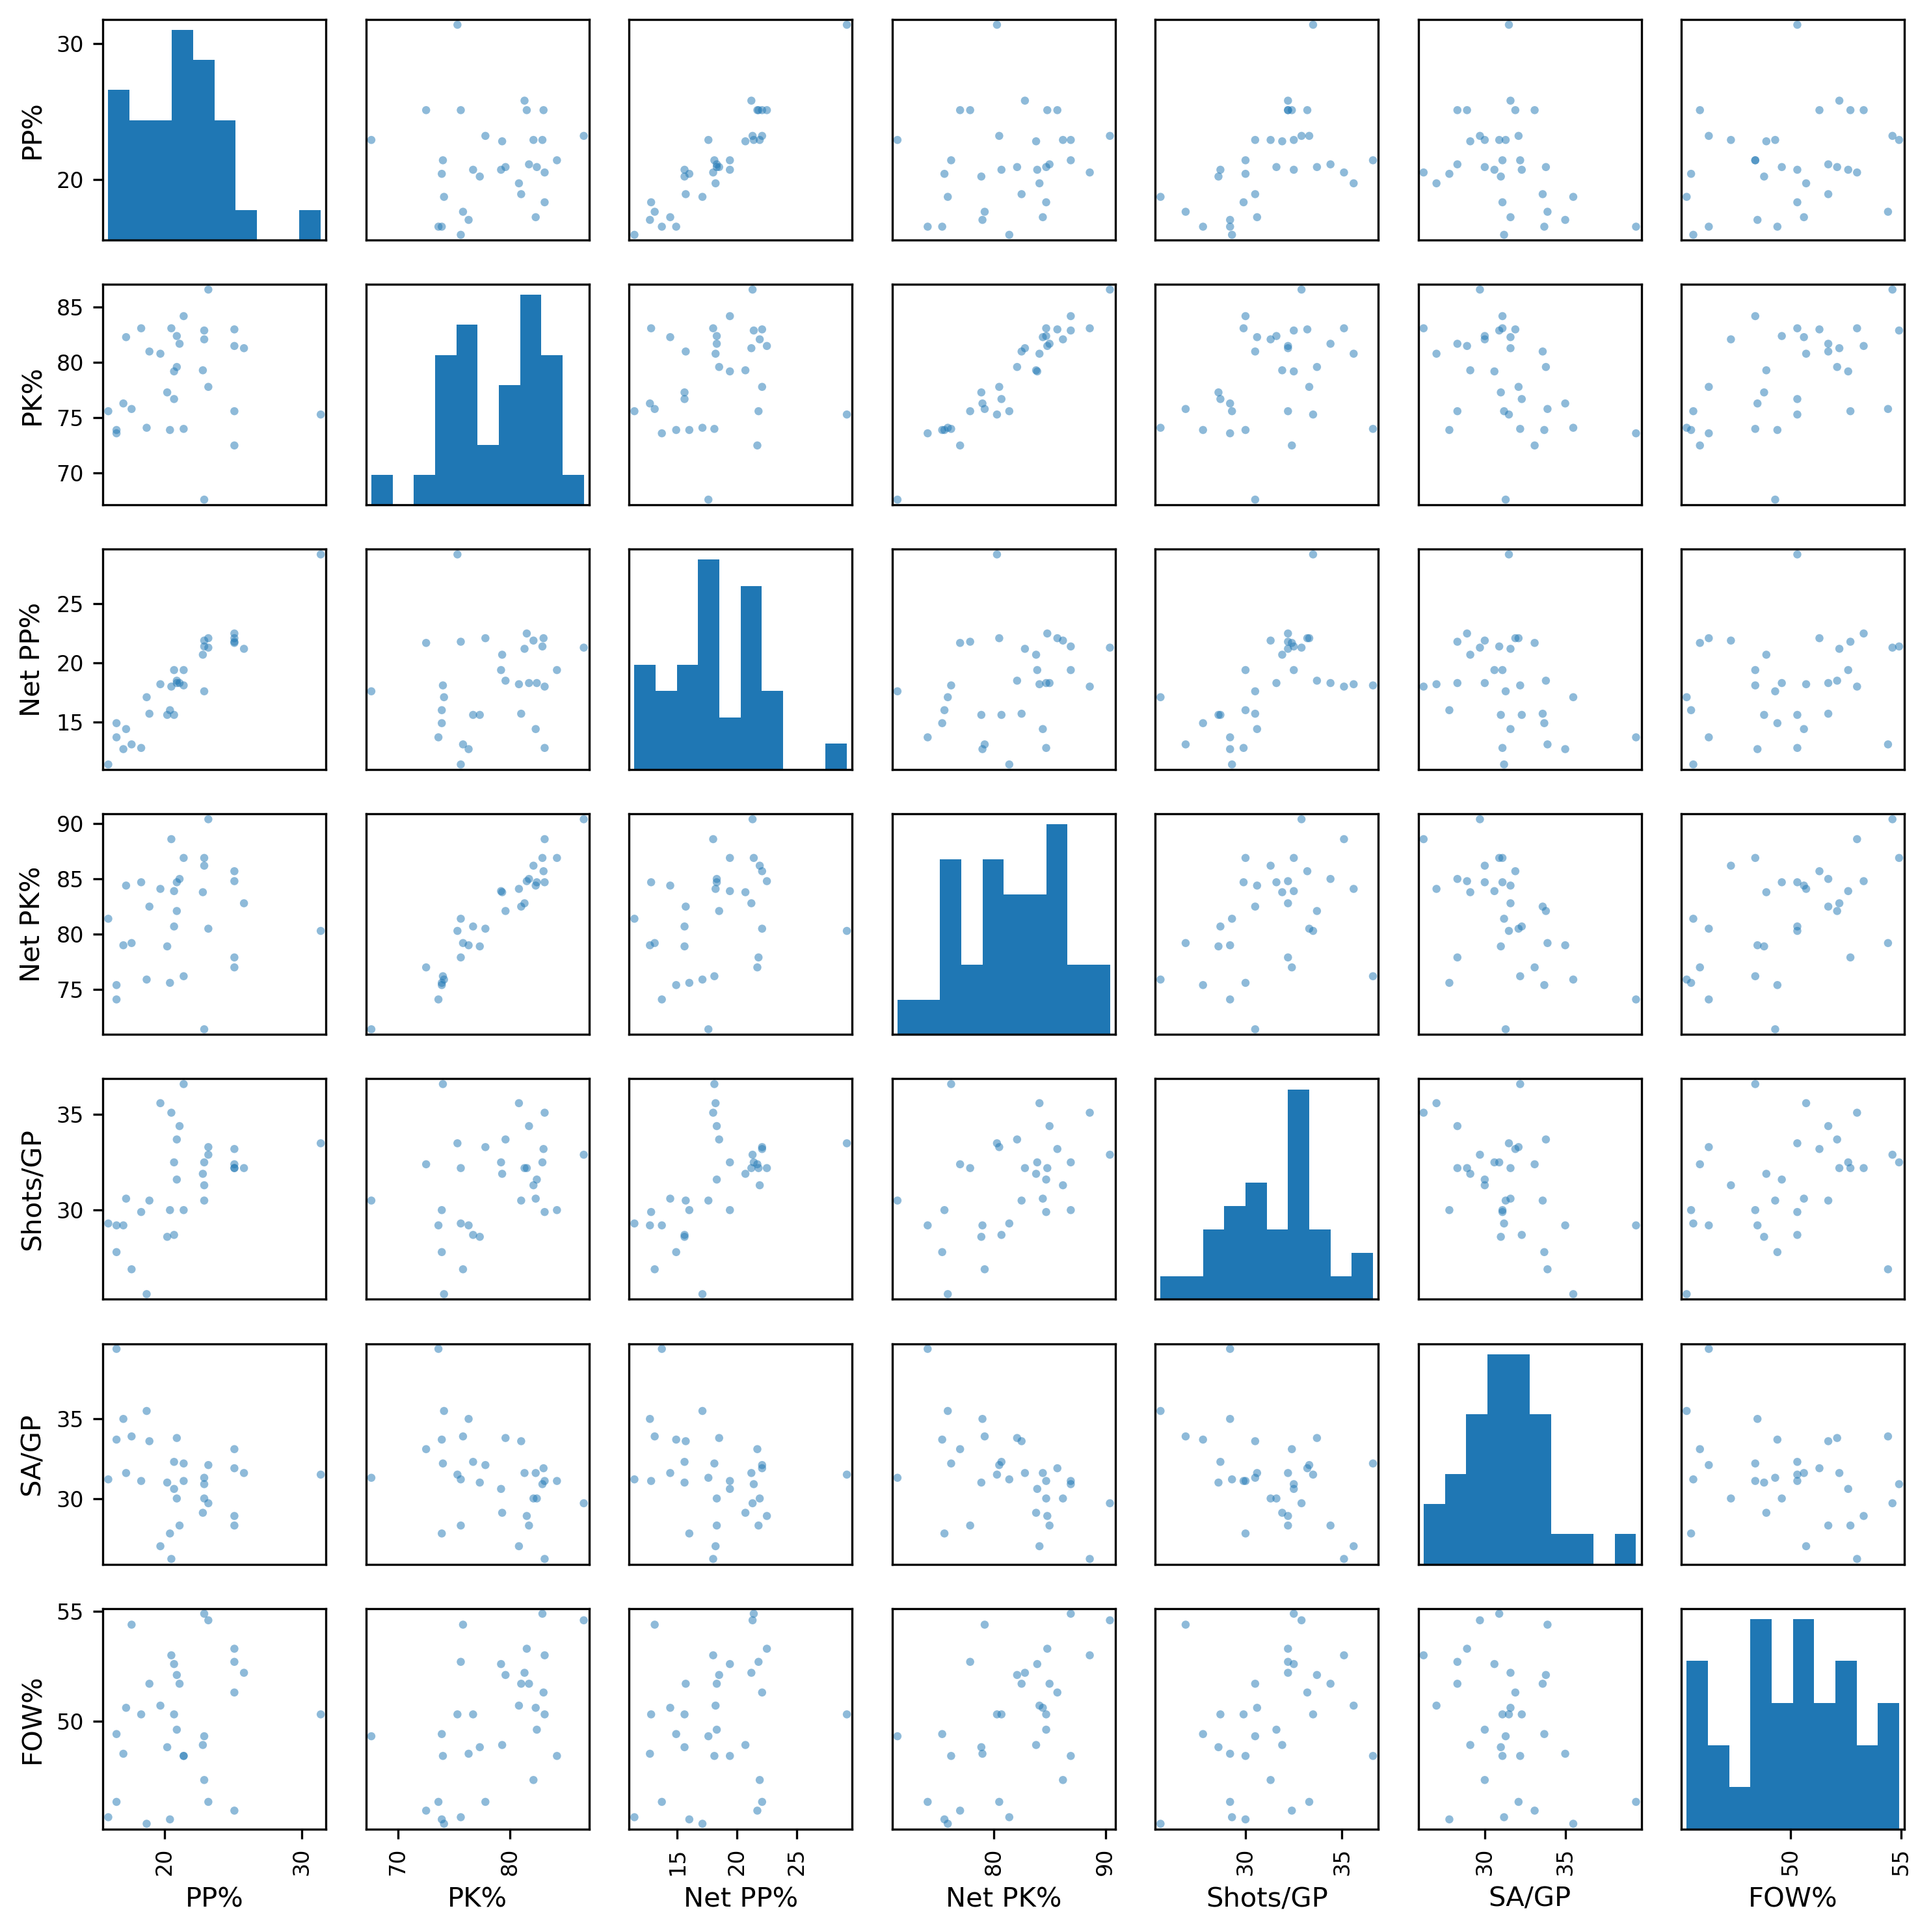

In [11]:
scatter_matrix = pd.plotting.scatter_matrix(team_stats[["PP%", "PK%", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%"]], figsize = [10,10])
scatter_matrix;

In [12]:
print(team_stats[["Net PK%", "PK%"]].corr()["Net PK%"]["PK%"])
print(team_stats[["Net PP%", "PP%"]].corr()["Net PP%"]["PP%"])

0.9576901402554916
0.9409767632817932


The predictors Net PK% and PK% are highly correlated with one another. So are Net PP% and PP%. The presence of colinearity is detrimental as it increases model variance in SLR and MLR models. Net PK% and Net PP% are kept because they produced a higher correlation to points than PP% and PK%.

In [13]:
predictors = team_stats[["GF/GP", "GA/GP", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%"]].to_numpy()
points = team_stats["P"].to_numpy()

model = linear_model.LinearRegression()
model.fit(predictors, points)

print(f'Points = {model.intercept_:.4} + ({model.coef_[0]:.3})GF/GP + ({model.coef_[1]:.3})GA/GP + ' \
      f'({model.coef_[2]:.3})Net PP% + ({model.coef_[3]:.3})Net PK% + ({model.coef_[4]:.3})Shots/GP + ' \
      f'({model.coef_[5]:.3})SA/GP + ({model.coef_[6]:.3})FOW%')

Points = 131.5 + (13.4)GF/GP + (-24.0)GA/GP + (0.148)Net PP% + (-0.625)Net PK% + (0.0756)Shots/GP + (-0.119)SA/GP + (0.411)FOW%


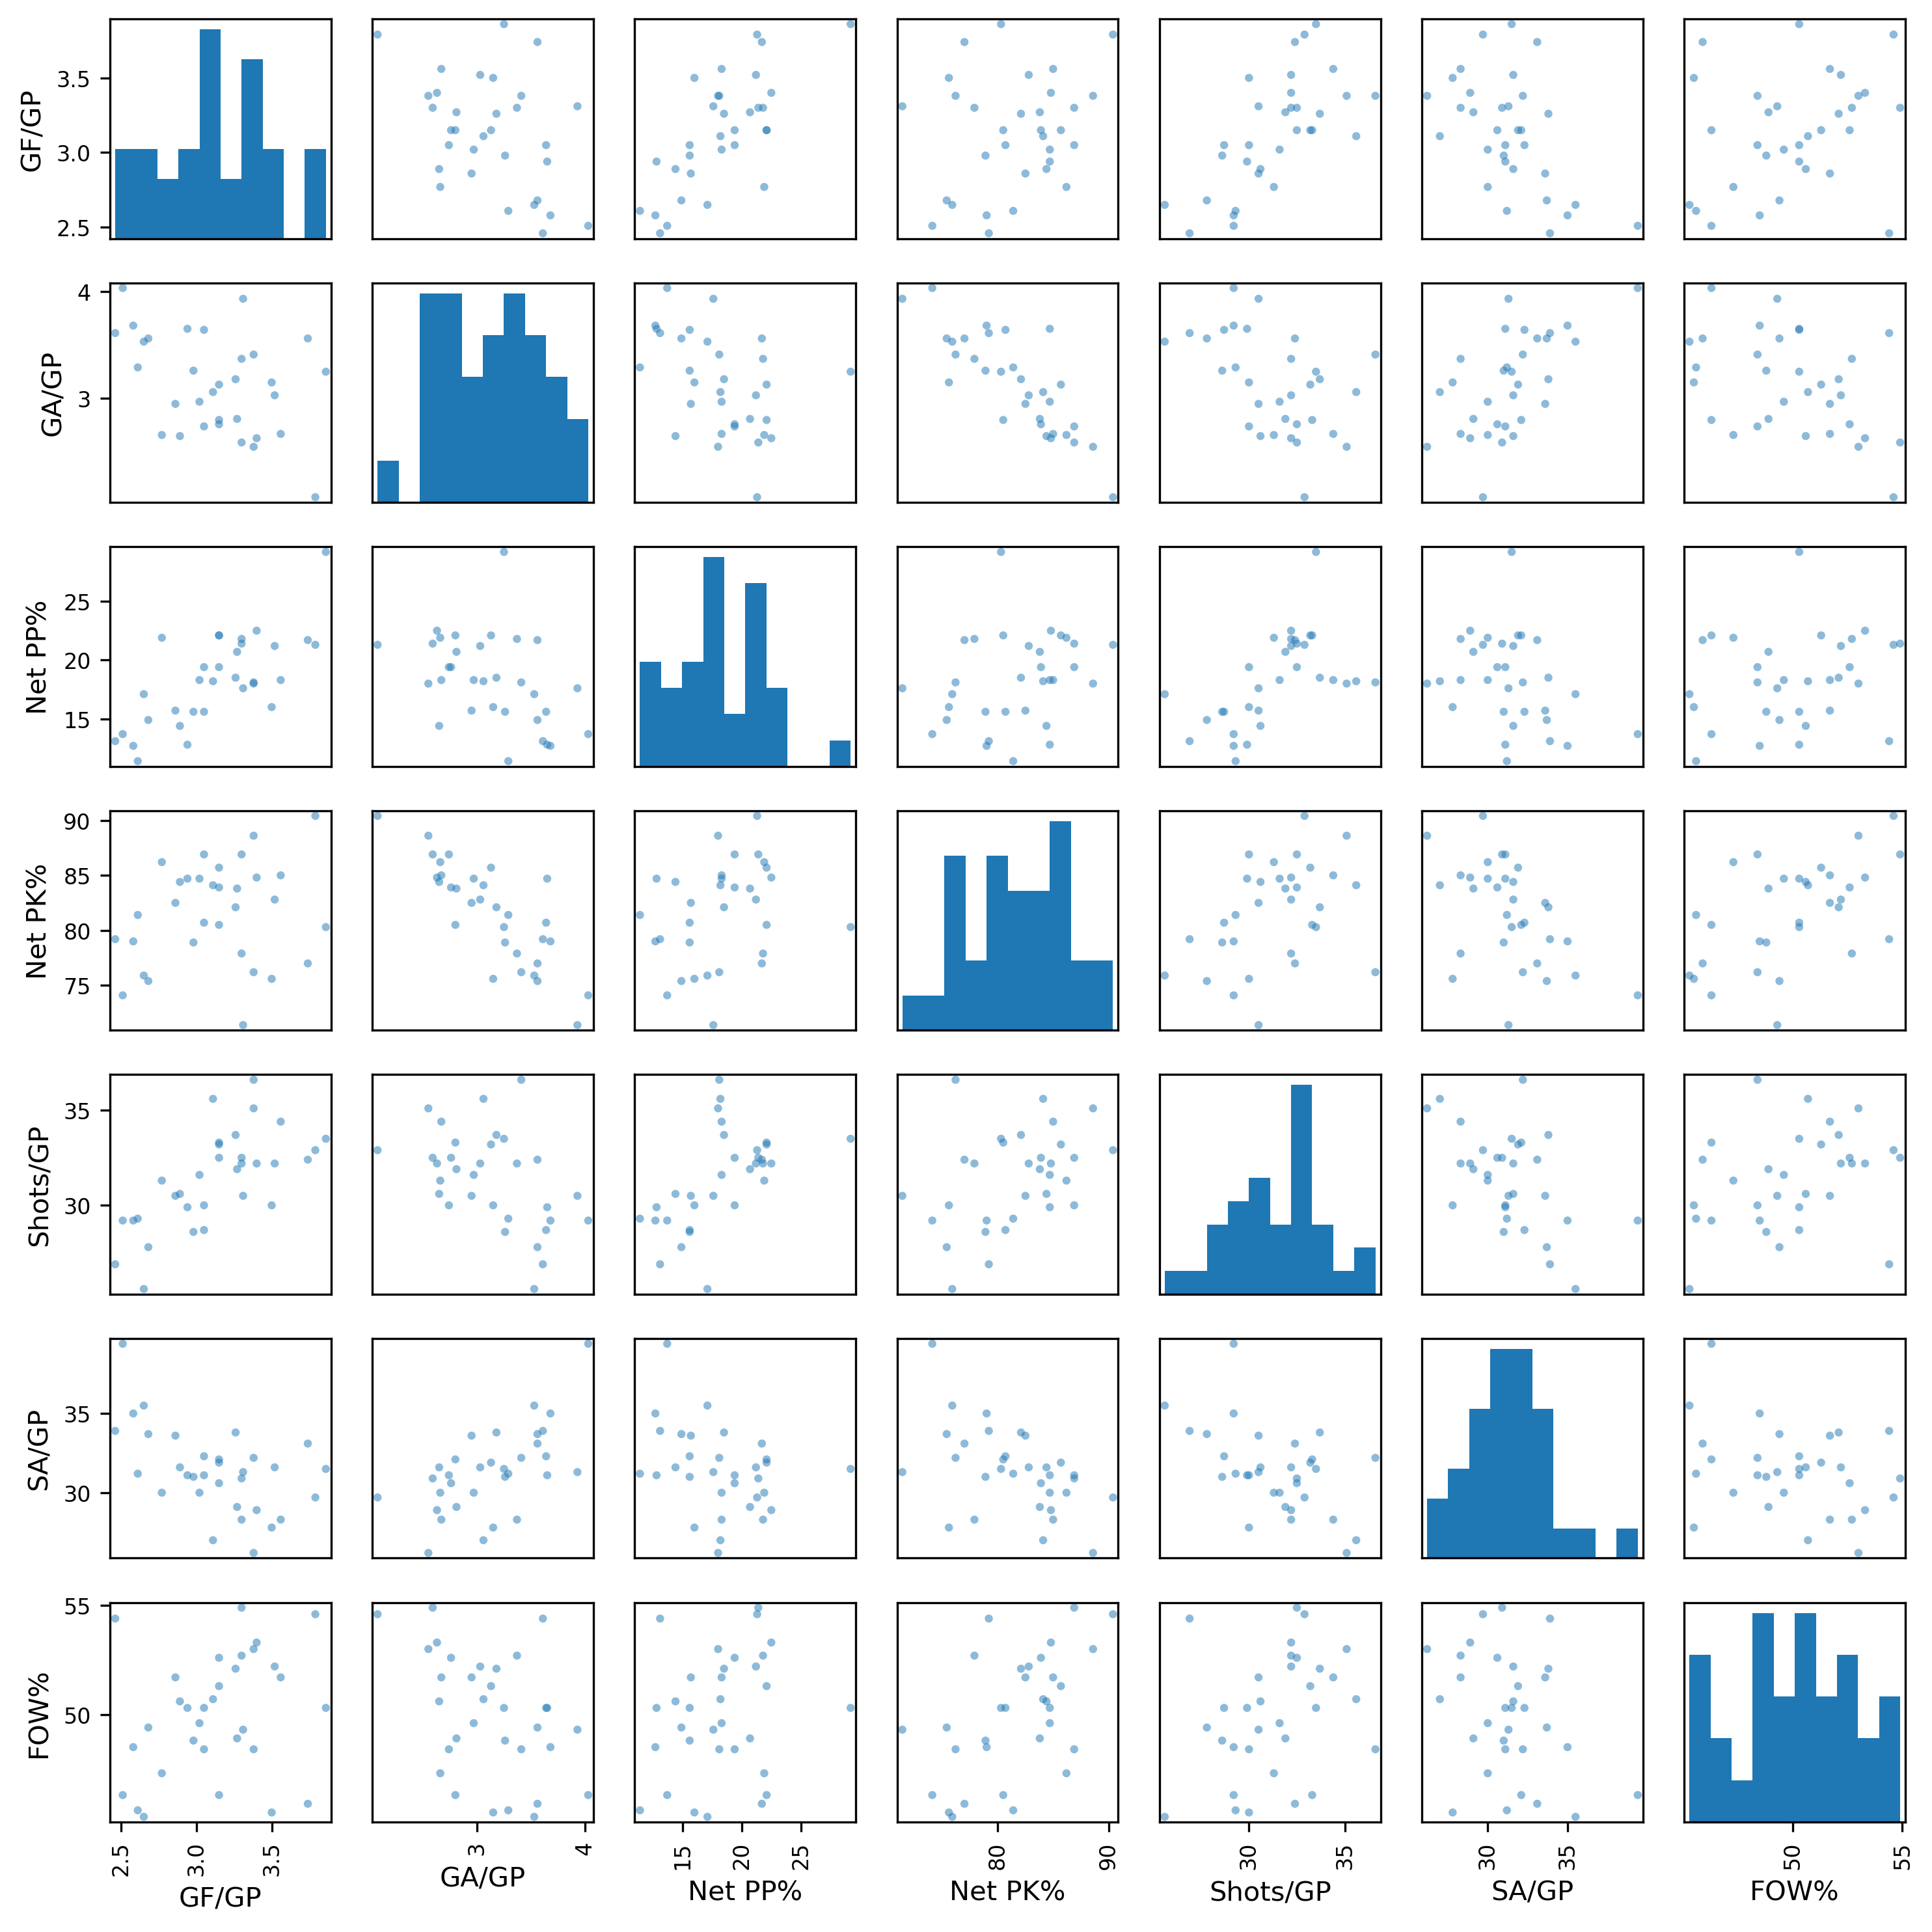

In [14]:
scat_matrix = pd.plotting.scatter_matrix(team_stats[["GF/GP", "GA/GP", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%"]], figsize = [10,10])
scat_matrix;

The scatter matrix above shows little colinearity so the model variance will be greatly reduced.

## Comparing Features against Points

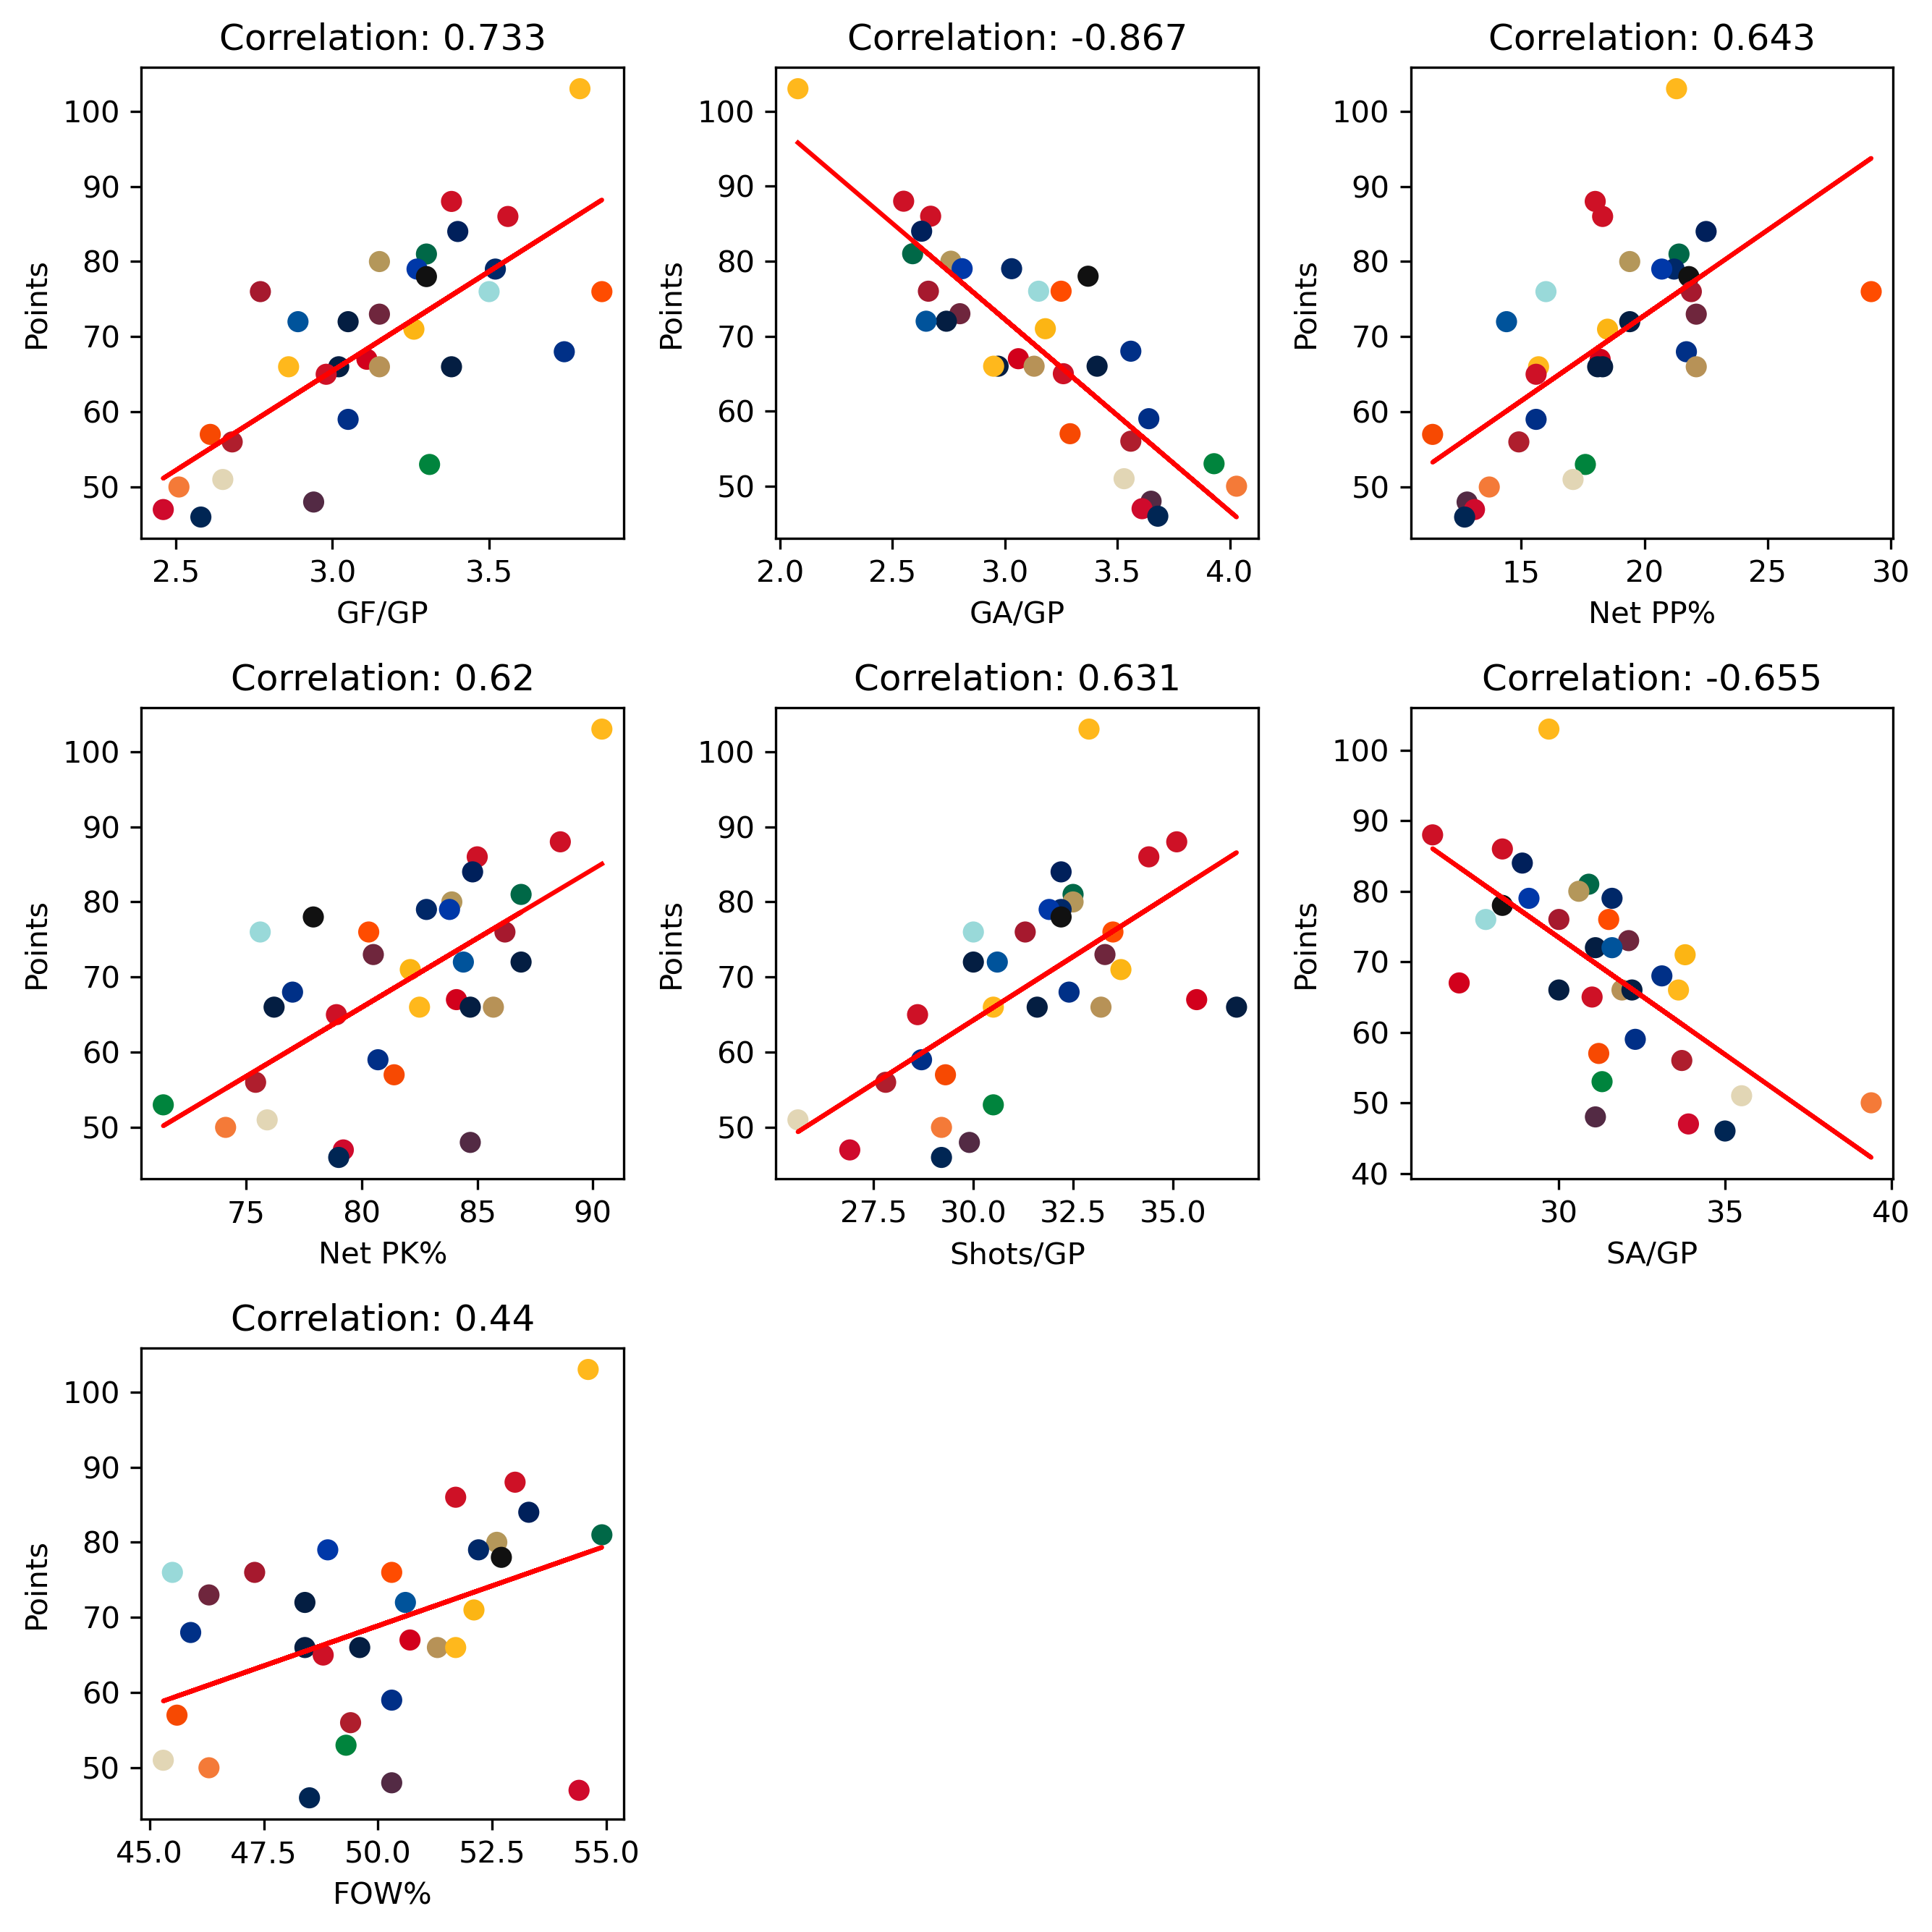

In [15]:
plt.rcParams["figure.figsize"] = [9,9]

plt.subplot(3,3,1)
plt.scatter(team_stats["GF/GP"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("GF/GP");plt.ylabel("Points")
lr.fit(team_stats["GF/GP"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["GF/GP"], w*team_stats["GF/GP"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["GF/GP", "P"]].corr()["GF/GP"]["P"]:.3}')

plt.subplot(3,3,2)
plt.scatter(team_stats["GA/GP"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("GA/GP");plt.ylabel("Points")
lr.fit(team_stats["GA/GP"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["GA/GP"], w*team_stats["GA/GP"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["GA/GP", "P"]].corr()["GA/GP"]["P"]:.3}')

plt.subplot(3,3,3)
plt.scatter(team_stats["Net PP%"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("Net PP%");plt.ylabel("Points")
lr.fit(team_stats["Net PP%"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["Net PP%"], w*team_stats["Net PP%"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["Net PP%", "P"]].corr()["Net PP%"]["P"]:.3}')

plt.subplot(3,3,4)
plt.scatter(team_stats["Net PK%"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("Net PK%");plt.ylabel("Points")
lr.fit(team_stats["Net PK%"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["Net PK%"], w*team_stats["Net PK%"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["Net PK%", "P"]].corr()["Net PK%"]["P"]:.3}')

plt.subplot(3,3,5)
plt.scatter(team_stats["Shots/GP"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("Shots/GP");plt.ylabel("Points")
lr.fit(team_stats["Shots/GP"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["Shots/GP"], w*team_stats["Shots/GP"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["Shots/GP", "P"]].corr()["Shots/GP"]["P"]:.3}')

plt.subplot(3,3,6)
plt.scatter(team_stats["SA/GP"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("SA/GP");plt.ylabel("Points")
lr.fit(team_stats["SA/GP"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["SA/GP"], w*team_stats["SA/GP"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["SA/GP", "P"]].corr()["SA/GP"]["P"]:.3}')

plt.subplot(3,3,7)
plt.scatter(team_stats["FOW%"], team_stats["P"], c = team_stats["Color"])
plt.xlabel("FOW%");plt.ylabel("Points")
lr.fit(team_stats["FOW%"].to_numpy().reshape(-1, 1), team_stats["P"])
w = lr.coef_[0]
plt.plot(team_stats["FOW%"], w*team_stats["FOW%"]+lr.intercept_, c='red')
plt.title(f'Correlation: {team_stats[["FOW%", "P"]].corr()["FOW%"]["P"]:.3}')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=.5, hspace=.5)

Visualizing the relationships between points and other predictors, trends are clearly visible with high correlations. Some of the stongest predictors appear to be "GF/GP" and "GA/GP". This makes sense as the more goals scored and the less goals allowed, the more points a team would get per game. 
    
This leads to the question if there are any significant varibles that are associated with winning the Stanley Cup. For this, data should be taken from each year where the dependent variable is winning the stanley cup or not. Predictor variables should be non-highly-correlated; feature selection will be enforced. 
    
Some models to begin analysis include decision tree, logistic regression, or KNN classifiers. Grid search will be utilized to find algorithm parameters which produce the best accuracy. Precision, recall, accuracy, and area under ROC curve will be compared for each machine learning approach, narrowing down the choices for best model.

# Machine Learning

To begin analyzing how different predictors are associated with winning the Stanley Cup, the outcome variable must be defined. Each seasons' statistics can be downloaded onto separate csv files. The plan is to manually stack the data and to treat each row as its own observation. The team name will be ignored and not be a predictor as numerous expansions have occured over the past few decades. Another column must be computed: a Stanley Cup Winner dummy variable labeled as '1' for win and '0' for loss. Since FOW% was starting to be recorded during the '97-'98 season, the training data will consist of the seasons between 1997-2022. 

In [16]:
stats = pd.read_csv("97_22_Team_Stats.csv")

In [17]:
len(stats)

717

In [18]:
team_dict = {'Boston Bruins':0,
 'Carolina Hurricanes':0,
 'New Jersey Devils':0,
 'Toronto Maple Leafs':0,
 'Dallas Stars':0,
 'Vegas Golden Knights':0,
 'Tampa Bay Lightning':0,
 'New York Rangers':0,
 'Los Angeles Kings':0,
 'Minnesota Wild':0,
 'Seattle Kraken':0,
 'Edmonton Oilers':0,
 'Colorado Avalanche':0,
 'Winnipeg Jets':0,
 'New York Islanders':0,
 'Pittsburgh Penguins':0,
 'Buffalo Sabres':0,
 'Calgary Flames':0,
 'Ottawa Senators':0,
 'Florida Panthers':0,
 'Washington Capitals':0,
 'Nashville Predators':0,
 'Detroit Red Wings':0,
 'St. Louis Blues':0,
 'Philadelphia Flyers':0,
 'Montréal Canadiens':0,
 'Vancouver Canucks':0,
 'Arizona Coyotes':0,
 'Anaheim Ducks':0,
 'San Jose Sharks':0,
 'Chicago Blackhawks':0,
 'Columbus Blue Jackets':0}
for i in team_stats["Team"]:
    team_dict[i] = team_dict[i] + stats.loc[stats["Team"] == i, "Cup Win"].sum()
team_dict

{'Boston Bruins': 1,
 'Carolina Hurricanes': 1,
 'New Jersey Devils': 2,
 'Toronto Maple Leafs': 0,
 'Dallas Stars': 1,
 'Vegas Golden Knights': 0,
 'Tampa Bay Lightning': 3,
 'New York Rangers': 0,
 'Los Angeles Kings': 2,
 'Minnesota Wild': 0,
 'Seattle Kraken': 0,
 'Edmonton Oilers': 0,
 'Colorado Avalanche': 2,
 'Winnipeg Jets': 0,
 'New York Islanders': 0,
 'Pittsburgh Penguins': 3,
 'Buffalo Sabres': 0,
 'Calgary Flames': 0,
 'Ottawa Senators': 0,
 'Florida Panthers': 0,
 'Washington Capitals': 1,
 'Nashville Predators': 0,
 'Detroit Red Wings': 3,
 'St. Louis Blues': 1,
 'Philadelphia Flyers': 0,
 'Montréal Canadiens': 0,
 'Vancouver Canucks': 0,
 'Arizona Coyotes': 0,
 'Anaheim Ducks': 1,
 'San Jose Sharks': 0,
 'Chicago Blackhawks': 3,
 'Columbus Blue Jackets': 0}

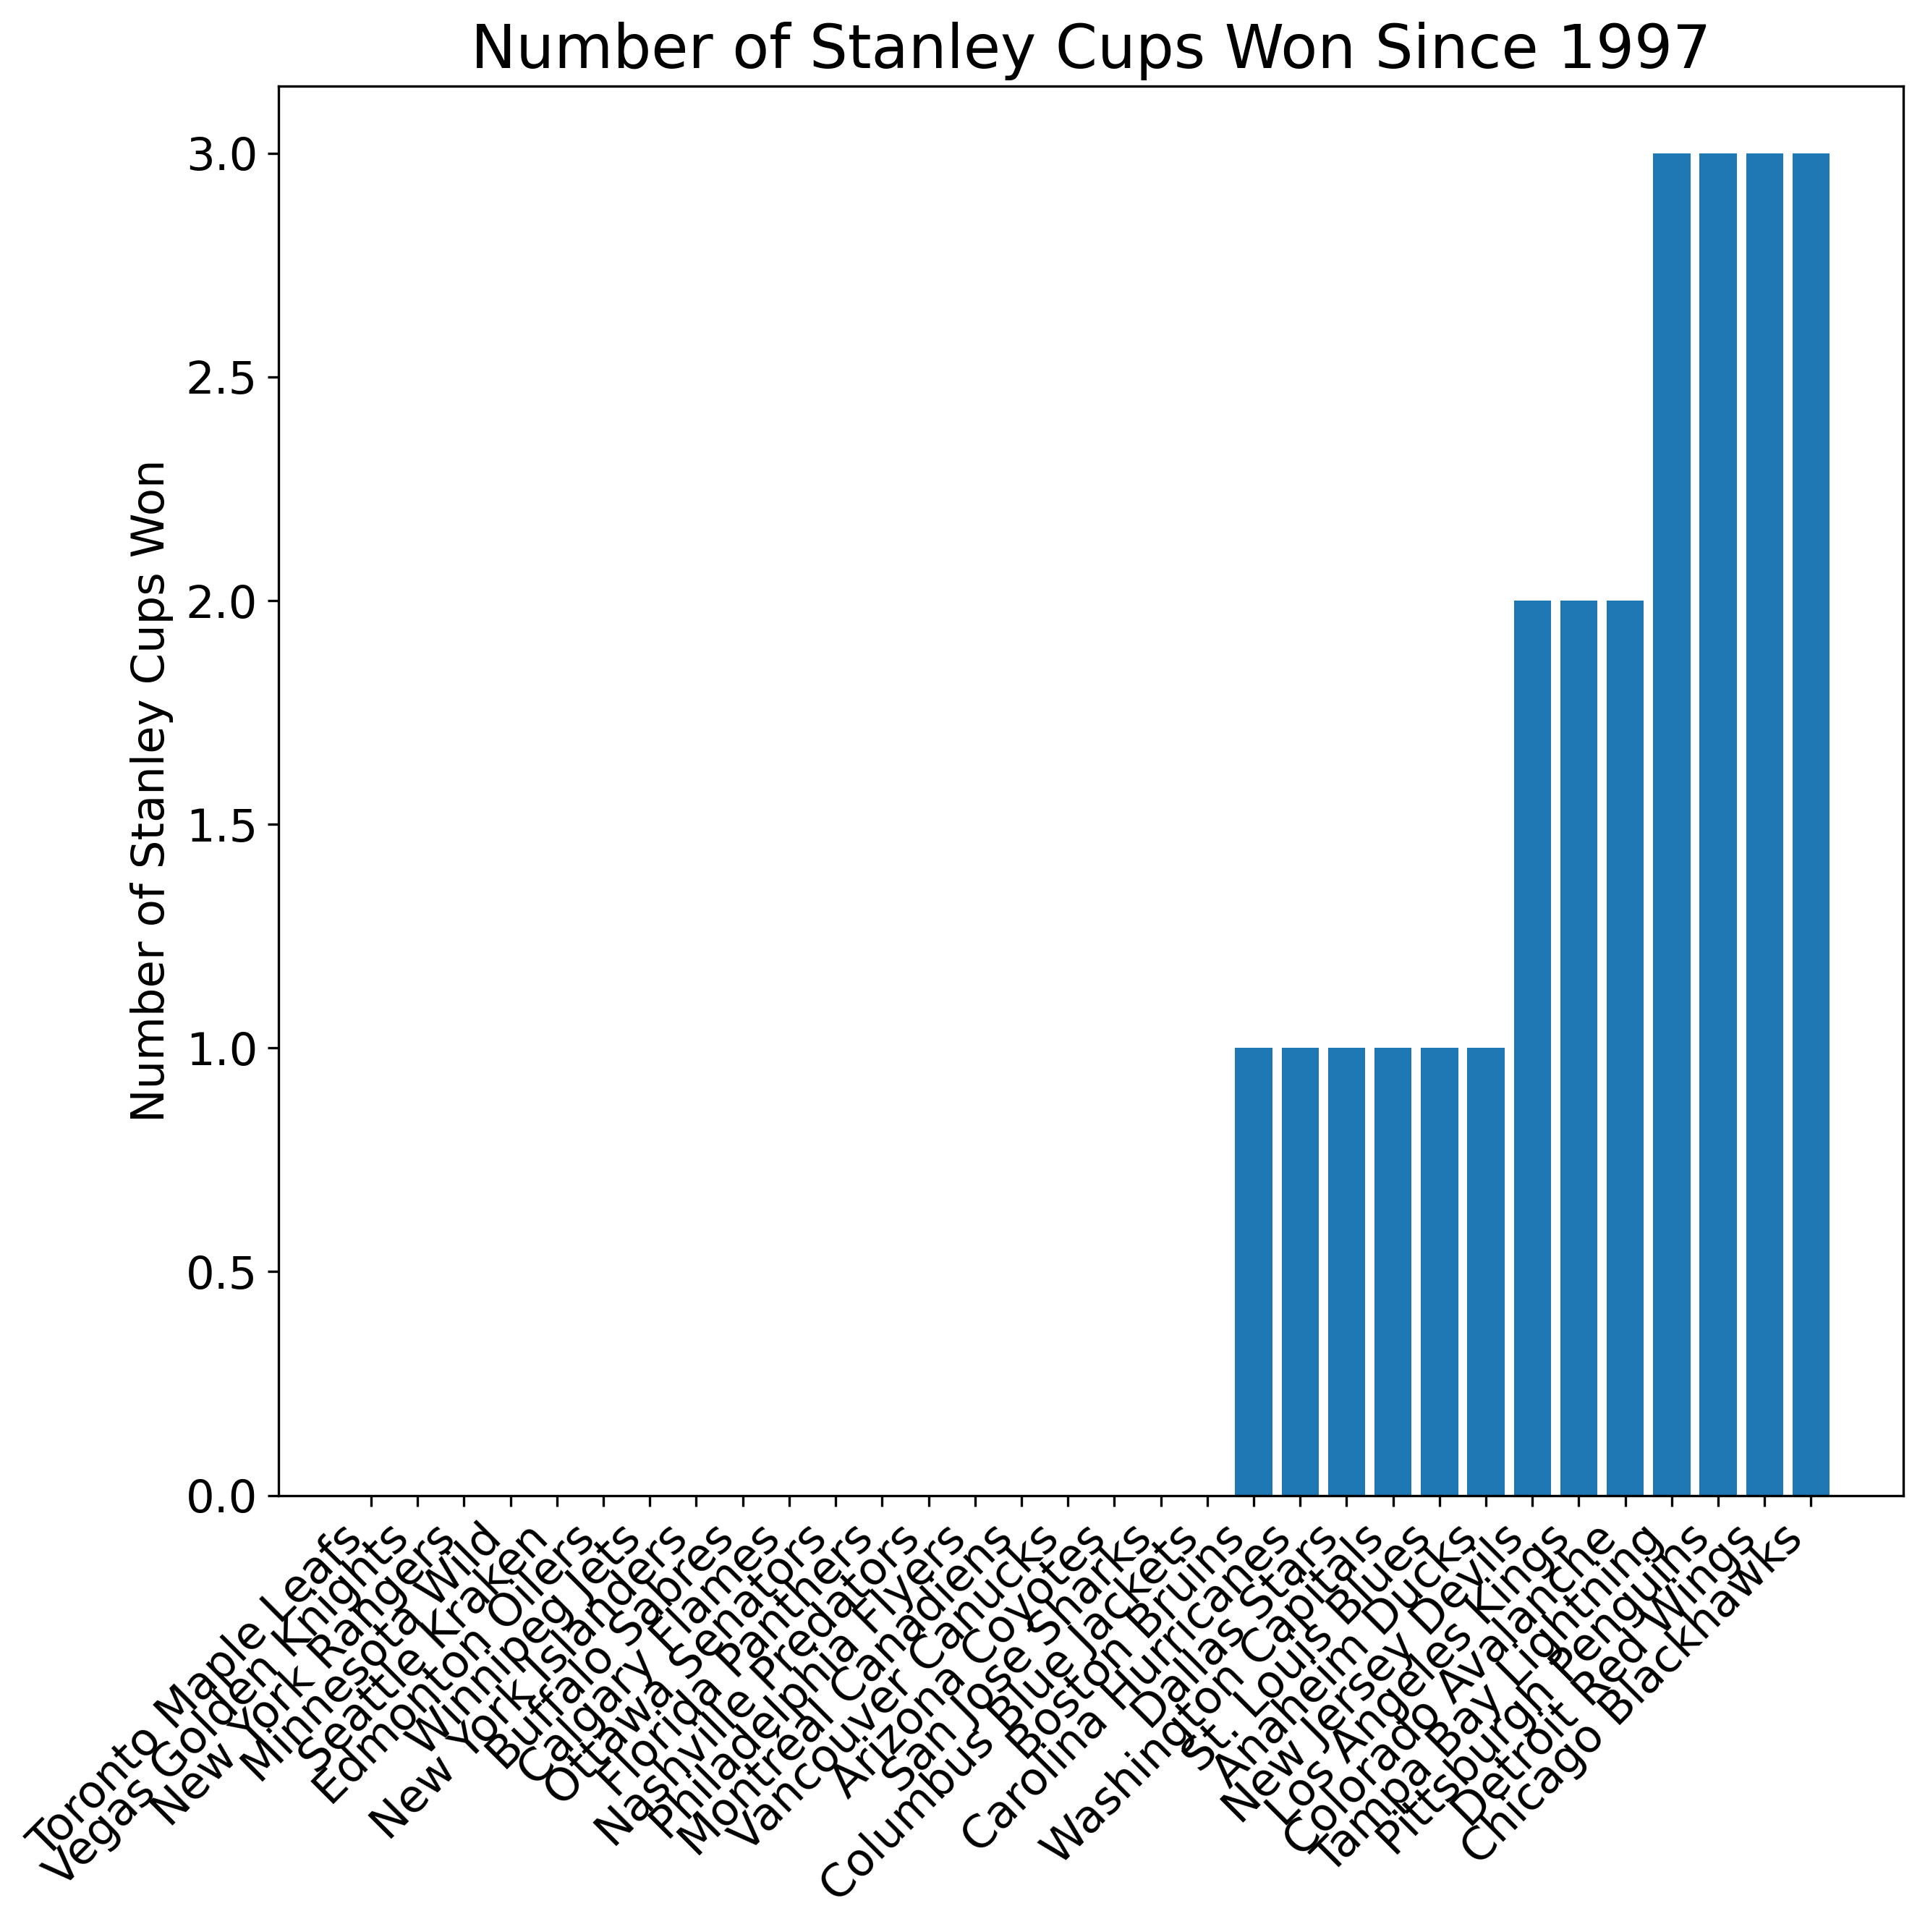

In [19]:
sorted_team_dict = dict(sorted(team_dict.items(), key=lambda x:x[1]))



names = list(sorted_team_dict.keys())
values = list(sorted_team_dict.values())
plt.bar(range(len(sorted_team_dict)), values, tick_label=names)
plt.xticks(rotation=45, ha='right', fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Number of Stanley Cups Won Since 1997", fontsize = 20)
plt.ylabel("Number of Stanley Cups Won", fontsize = 15)
plt.show()

A Chi Square Test for independence would help determine if the distribution of cup wins is independent of team. This is a puzzling challenge as the Atlanta Thrashers were introduced in 1999 only to relocate to Winnipeg in 2011, the introduction of the Minnesota Wild and Columbus Blue Jackets in 2000, as well as the later installments of the Vegas Golden Knights and Seattle Kraken. The most accurate analysis would be produced with a set number of teams over a specific period of time. 

But one major flaw of the Chi Square Test is that all teams should have an expected count of at least 5, but 10 is preferred. If the teams are independent of Stanley Cup Wins, then they should all have an equal expected count. This means, if each of the 32 teams were to have an expected count of 10, we would need 320 seasons of data for all teams. Thus, the Chi Square Test is an inadequate analysis for determining if number of Stanley Cup wins is independent from teams.

In [20]:
list(stats.columns)

['Team',
 'Season',
 'GP',
 'W',
 'L',
 'T',
 'OT',
 'P',
 'P%',
 'RW',
 'ROW',
 'S/O Win',
 'GF',
 'GA',
 'GF/GP',
 'GA/GP',
 'PP%',
 'PK%',
 'Net PP%',
 'Net PK%',
 'Shots/GP',
 'SA/GP',
 'FOW%',
 'Cup Win']

If Cup Win is the dependent variable, then predictors should exclude Team, Season, GP,

In [21]:
y_train = stats["Cup Win"]
x_train = stats[["GF/GP", "GA/GP", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%", "P%"]]

x_test = x_train.iloc[:32]
y_test = y_train.iloc[:32]

def transformData(feature):
    df_ = pd.get_dummies(feature, drop_first=False)
    df_name = df_.columns[0]
    return df_.drop([df_name], axis=1)

y_train = transformData(stats["Cup Win"])
    
y_test = y_test.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
x_train = x_train.to_numpy()

0.96875
The accuracy is: 0.969, the precision is: 0.0, the recall is: 0.0, and the AUC is: 0.871


C:\Users\pkrys\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pkrys\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


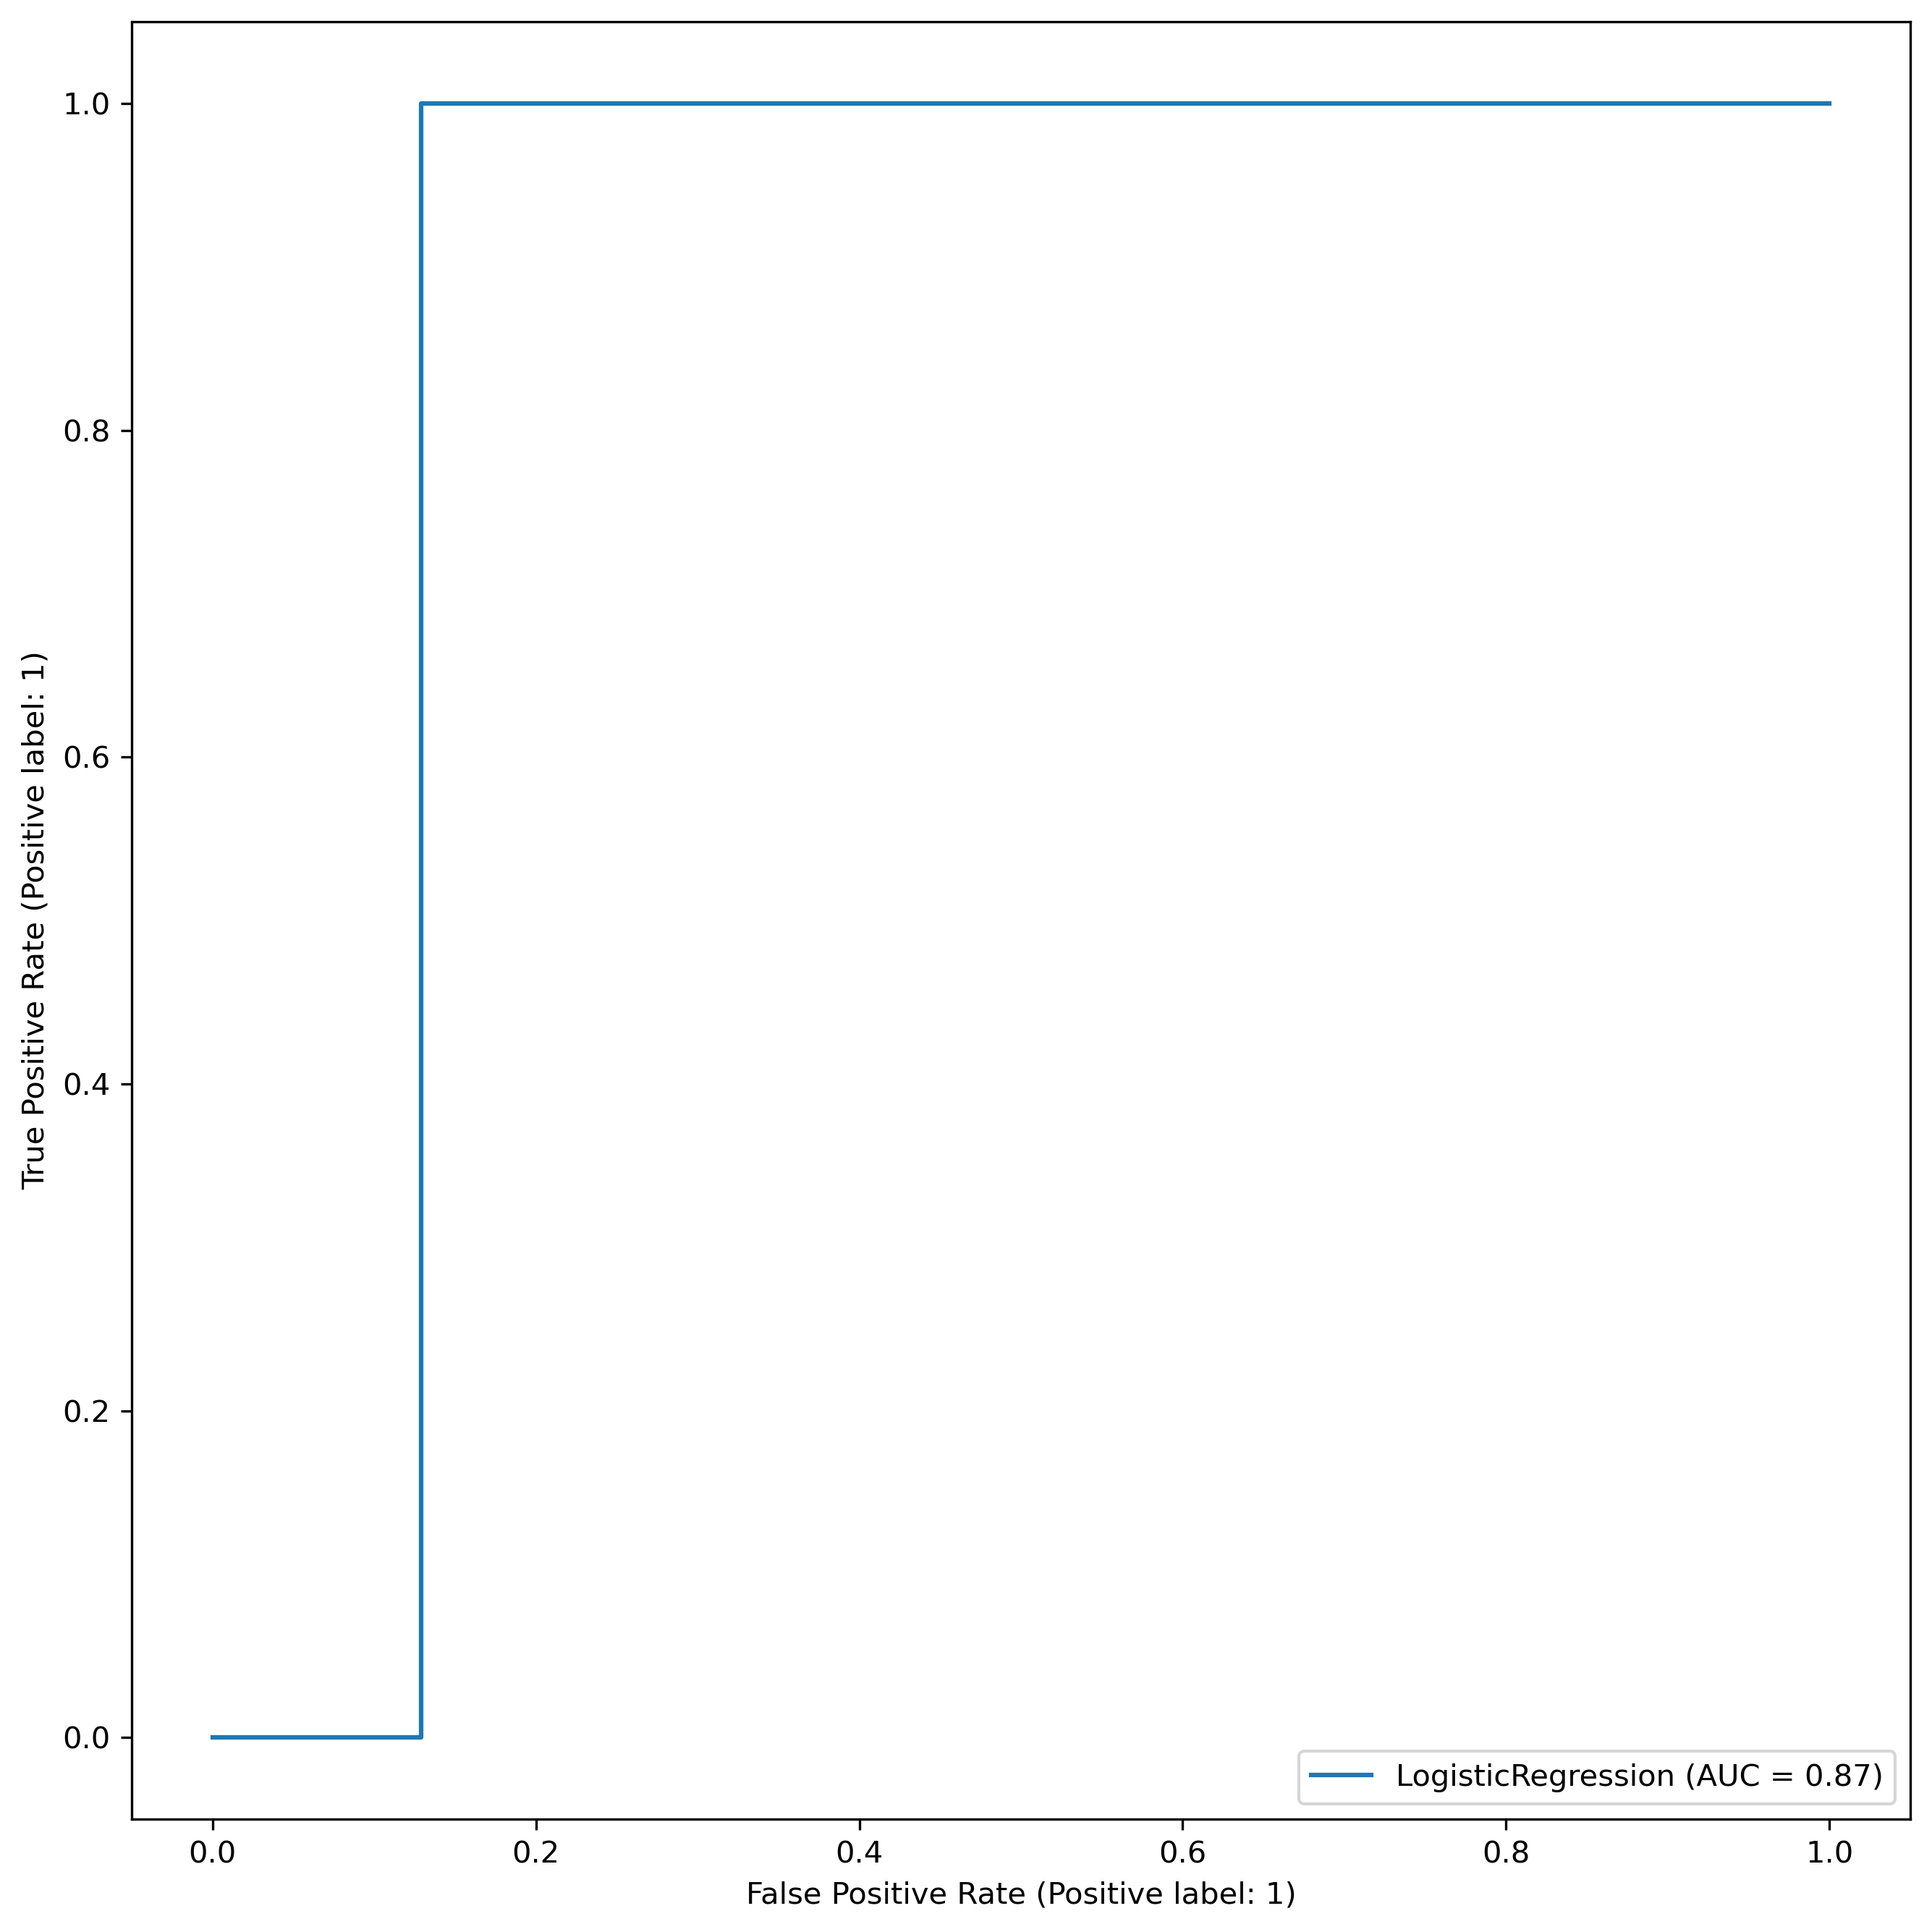

In [22]:
model = linear_model.LogisticRegression(C=1, penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

pred = model.predict(x_test)

probs = model.predict_proba(x_test)[:, 1]  ##array with probability y is equal to 1
#print(probs)
#print(y_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

AUC = roc_auc_score(y_test, probs)
print(f'The accuracy is: {accuracy:.3}, the precision is: {precision:.3}, the recall is: {recall:.3}, and the AUC is: {AUC:.3}')

RocCurveDisplay.from_estimator(model, x_test, y_test)

With a high accuracy and a low precision, we can assume the algorithm predicts all teams to not win the Stanley Cup every year. Doing so greatly increases its accuracy, but contains too many false negative results to be truely precise. We should take a random sample of the training data so the y_training "Cup Win" predictor variable will be 50/50 within the training data.

In [23]:
n = sum(y_train)[0]

So we want a random dataset with 24 cup wins and 24 cup losses.

In [24]:
stats

X_train_0 = stats[stats["Cup Win"] == 0]
X_train_0 = X_train_0.sample(n)

X_train_1 = stats[stats["Cup Win"] == 1]

new_stats = pd.concat([X_train_0, X_train_1])
print(new_stats)

                      Team    Season  GP   W   L   T  OT    P     P%  RW  ...  \
168    Tampa Bay Lightning  20162017  82  42  30  --  10   94  0.573  32  ...   
431          Boston Bruins  20072008  82  41  29  --  12   94  0.573  32  ...   
536     Colorado Avalanche  20032004  82  40  22  13   7  100  0.610  32  ...   
89   Columbus Blue Jackets  20192020  70  33  22  --  15   81  0.579  25  ...   
360           Dallas Stars  20102011  82  42  29  --  11   95  0.579  32  ...   
80         St. Louis Blues  20192020  71  42  19  --  10   94  0.662  33  ...   
350    Washington Capitals  20102011  82  48  23  --  11  107  0.652  34  ...   
573        San Jose Sharks  20022003  82  28  37   9   8   73  0.445  26  ...   
554        Ottawa Senators  20022003  82  52  21   8   1  113  0.689  45  ...   
30    Vegas Golden Knights  20212022  82  43  31  --   8   94  0.573  34  ...   
156      New Jersey Devils  20162017  82  28  40  --  14   70  0.427  18  ...   
196    Carolina Hurricanes  

In [37]:
X_train = new_stats[["GF/GP", "GA/GP", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%", "P%"]]
Y_train = new_stats["Cup Win"]

Y_train = Y_train.to_numpy()
X_train = X_train.to_numpy()

stats_23 = pd.read_csv("Team_Stats_22_23.csv")
stats_23_1 = stats_23.iloc[0:15]
stats_23_2 = stats_23.iloc[17]
stats_23 = stats_23_1.append(stats_23_2)
stats_23

X_test_23 = stats_23[["GF/GP", "GA/GP", "Net PP%", "Net PK%", "Shots/GP", "SA/GP", "FOW%", "P%"]]

C:\Users\pkrys\AppData\Local\Temp\ipykernel_11900\1725276357.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_23 = stats_23_1.append(stats_23_2)


0.59375
The accuracy is: 0.594, the precision is: 0.0714, the recall is: 1.0, and the AUC is: 0.903


C:\Users\pkrys\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


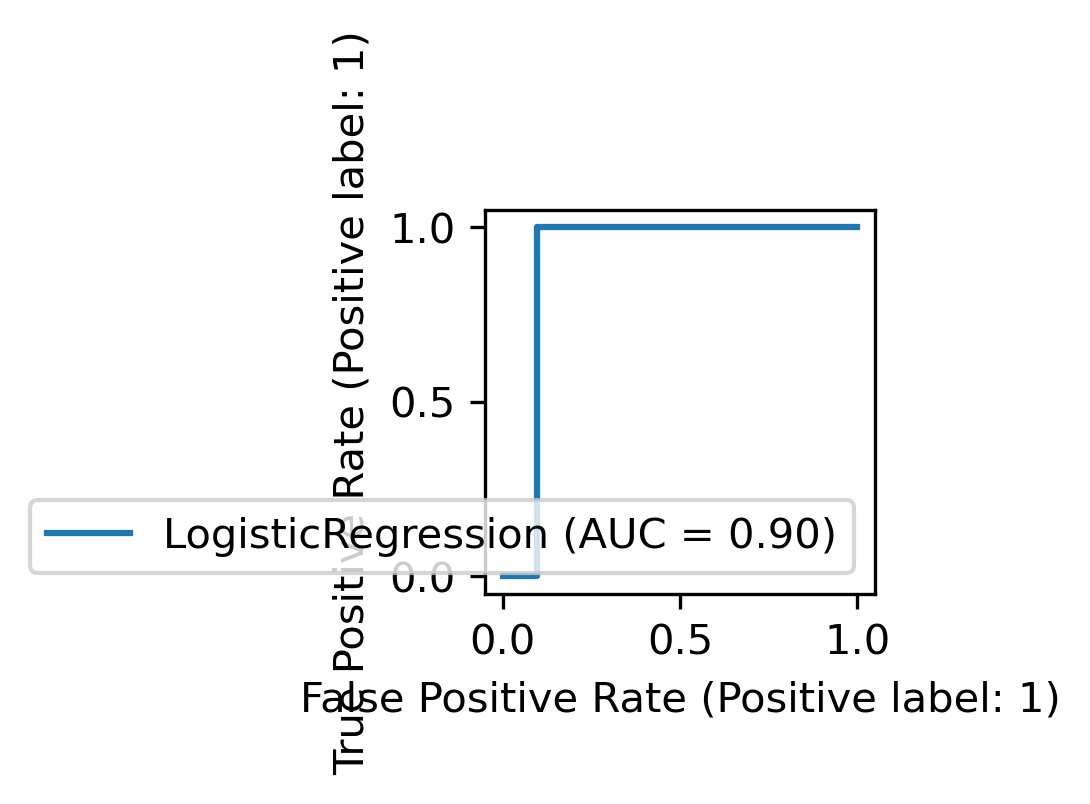

In [86]:
model = linear_model.LogisticRegression(C=1, penalty='l1', solver='liblinear')
model.fit(X_train, Y_train)
score = model.score(x_test, y_test)
print(score)

pred = model.predict(x_test)

probs = model.predict_proba(x_test)[:, 1]  ##array with probability y is equal to 1
#print(probs)
#print(y_test)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

AUC = roc_auc_score(y_test, probs)
print(f'The accuracy is: {accuracy:.3}, the precision is: {precision:.3}, the recall is: {recall:.3}, and the AUC is: {AUC:.3}')

RocCurveDisplay.from_estimator(model, x_test, y_test)

According to the logistic regression model, the Boston Bruins have the highest probability of winning the Stanley Cup in 2023. It is important to note this result based on a model with an accuracy of 0.594, precision of 0.0714, and recall 1.0. Note: accuracy is calculated by  total number of correct guesses, true positives plus true negatives, divided by the total number of guesses. Precision is calculated by the number of correct Stanley Cup win guesses divided by the total number of correct and incorrect Stanley Cup win guesses. Recall is equal to the number of correct Stanley Cup win guesses divided by number of correct Stanley Cup win guesses plus the number of incorrect Stanley Cup loss predictions. These results suggest the model is slightly better at predicting Stanley Cup wins than random guess alone according to its accuracy. Its precision is very low, showing we are overpredicting the probability of teams winning the Stanley Cup. The large recall is due to the model very rarily incorrectly guessing Stanley Cup losses.

The following displays the probability of winning the Stanley Cup in 2023 for the 16 teams going into the playoffs.

C:\Users\pkrys\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


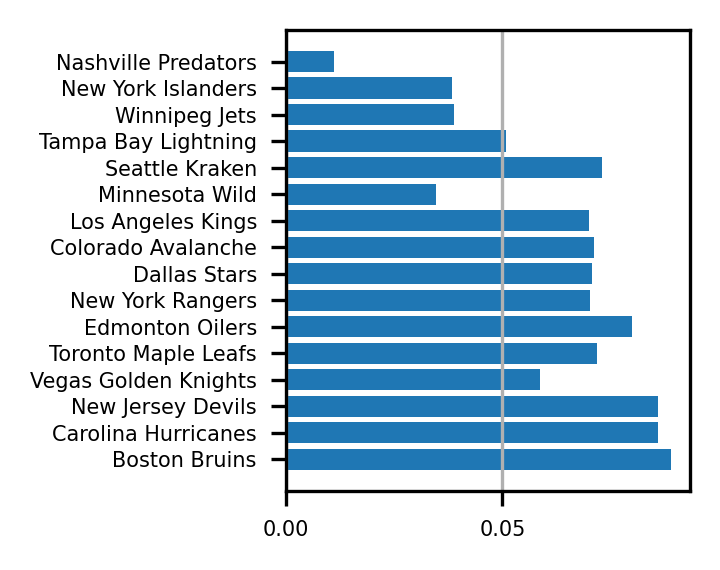

In [93]:
prob_of_winning = model.predict_proba(X_test_23)[:,1]
sum_prob_of_winning = sum(prob_of_winning)

x = prob_of_winning/sum_prob_of_winning

y = list(stats_23["Team"])
plt.rcParams['figure.figsize'] = [2.5, 2]

plt.barh(y,x)
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 5)
plt.grid(axis = "x")
